In [ ]:
#With help of https://medium.com/@russmislam/implementing-sift-in-python-a-complete-guide-part-1-306a99b50aa5

#TODO:
    # Create DOG
    # Find local extremas in Scale Space (key Points)

#Libs

In [ ]:
from skimage import io,data,color,transform
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

#Functions

## generateGaussianKernel

In [ ]:
def generateGaussianKernel(sigma=1,shape=None):
    if shape==None:    
        filter_size = 2 * int(4 * sigma + 0.5) + 1
        shape = (filter_size,filter_size)
    kernel = np.zeros(shape)
    m = shape[0]//2
    n = shape[0]//2
    for x in range(-m,m+1):
        for y in range(-n,n+1):
            kernel[x+m][y+n]= (1/(2*np.pi*sigma**2))*np.exp(-((x**2)+(y**2))/(2*sigma**2))
    return kernel*(1/np.sum(kernel))

## generateGaussianKernels

Computation of sigma if we convolve already convolved image.
$
\sigma =\sigma _1^{\:2}+\sigma _2^{\:2}
$


In [ ]:
def generateGaussianKernels(sigma, num_intervals):

    num_images_per_octave = num_intervals + 3
    k = 2 ** (1. / num_intervals)
    gaussian_kernels = np.zeros(num_images_per_octave)  # scale of gaussian blur necessary to go from one blur scale to the next within an octave
    gaussian_kernels[0] = sigma

    for image_index in range(1, num_images_per_octave):
        sigma_previous = (k ** (image_index - 1)) * sigma
        sigma_total = k * sigma_previous
        gaussian_kernels[image_index] = np.sqrt(sigma_total ** 2 - sigma_previous ** 2)
    return gaussian_kernels

def generateGaussianImages(image,sigmas,numOctaves,kernel_size=None):

    gaussian_images = []
    for i in range(numOctaves):
        blured_images_in_octave = []
        for s in sigmas:
            image = signal.convolve2d(image, generateGaussianKernel(s,kernel_size), mode="same")
            blured_images_in_octave.append(image)
        gaussian_images.append(blured_images_in_octave)
        octave_base = blured_images_in_octave[-3]
        image = transform.resize(octave_base,(octave_base.shape[0]//2,octave_base.shape[1]//2))
    return gaussian_images

def generateBaseImage(image, sigma, assumed_blur):
    image = transform.resize(image,(image.shape[0]*2,image.shape[1]*2))
    return image;

def computeNumberOfOctaves(image_shape):
    """Compute number of octaves in image pyramid as function of base image shape (OpenCV default)
    """
    return int(round(np.log(min(image_shape)) / np.log(2) - 1))

## generateDOGs

In [ ]:
img = color.rgb2gray(data.astronaut())
astr = generateBaseImage(img,1.6,0.5)
#numOctaves = computeNumberOfOctaves(astr.shape)
numOctaves = 3
sigmas = generateGaussianKernels(1.6,3)
GI = generateGaussianImages(astr,sigmas,numOctaves,(9,9))

#Visualizing Gaussian Pyramid

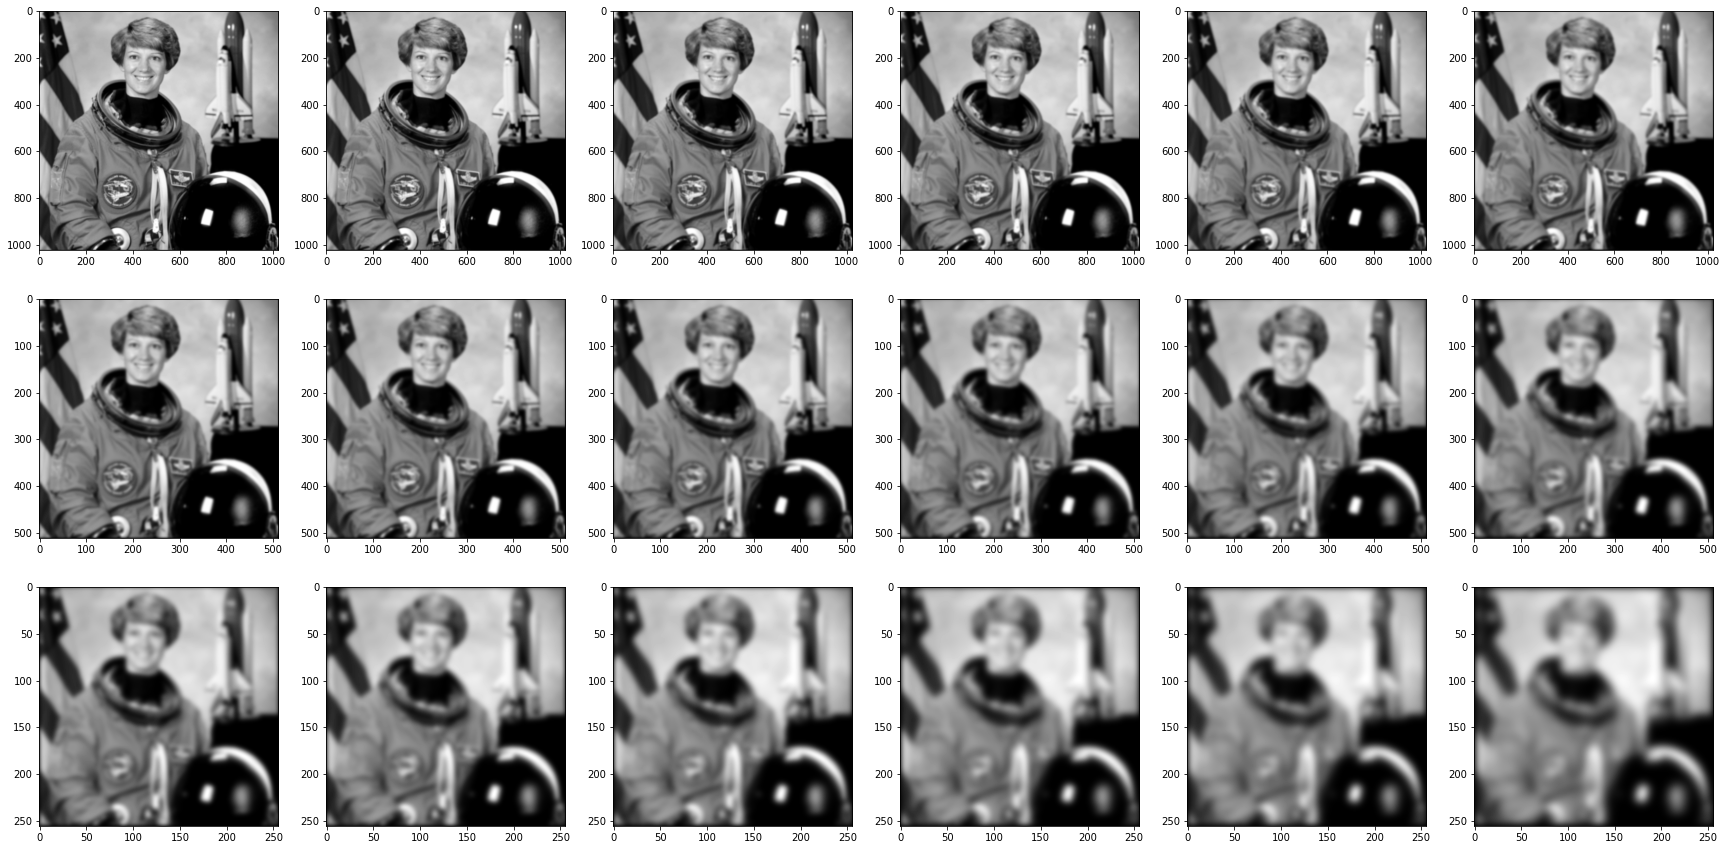

In [ ]:
plt.figure(figsize=(30,15))
dim1 = len(GI)
#dim1 = 1
dim2 = len(GI[0])
im_num = 1
for i in range(dim1):
    for j in range(dim2):
        plt.subplot(dim1,dim2,im_num)
        plt.imshow(GI[i][j],cmap="gray")
        im_num+=1